<a href="https://www.kaggle.com/code/gosberex/notebook9fca754ea4?scriptVersionId=250626674" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
# Ознайомитись з даними та структурою даних
# Створіть доповнення(transform) для тренувальних та тестових даних. посилання
# Створіть train_dataset та test_dataset за допомогою ImageFolder(папка train)
# Переконайтесь що у вас привильні назви класів train_dataset.classes
# Створіть DataLoader для тренувальних та тестових даних
# Візуалізуйте дані
# Збережіть kaggle notebook для подальшої роботи

In [3]:
import torchvision
from torchvision import transforms
import torch
from torchtune.datasets import ConcatDataset 

In [4]:
transformer = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ColorJitter(brightness=0, contrast=0, saturation=0, hue=0),
    transforms.RandomHorizontalFlip(0.5),
    transforms.RandomVerticalFlip(0.5),
    transforms.ToTensor()
])

In [5]:
datadir = "/kaggle/input/fruit-recognition/train/train"
data_set = torchvision.datasets.ImageFolder(datadir, transformer)
data_set.classes

['Apple Braeburn',
 'Apple Granny Smith',
 'Apricot',
 'Avocado',
 'Banana',
 'Blueberry',
 'Cactus fruit',
 'Cantaloupe',
 'Cherry',
 'Clementine',
 'Corn',
 'Cucumber Ripe',
 'Grape Blue',
 'Kiwi',
 'Lemon',
 'Limes',
 'Mango',
 'Onion White',
 'Orange',
 'Papaya',
 'Passion Fruit',
 'Peach',
 'Pear',
 'Pepper Green',
 'Pepper Red',
 'Pineapple',
 'Plum',
 'Pomegranate',
 'Potato Red',
 'Raspberry',
 'Strawberry',
 'Tomato',
 'Watermelon']

In [6]:
from torch.utils.data import random_split

train_dataset, test_dataset = random_split(data_set, [0.8, 0.2])
print(len(test_dataset))
len(train_dataset)

3370


13484

In [7]:
from torch.utils.data import DataLoader


batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

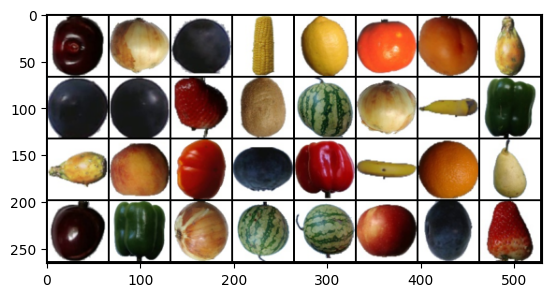

In [8]:
for x, y in train_loader:
    break

from torchvision.utils import make_grid
import matplotlib.pyplot as plt


grid = make_grid(x).permute(1, 2, 0) # результатом є тензор

plt.imshow(grid)


In [9]:
# На основі train_dataset та test_dataset з попереднього завдання створити train_loader та test_loader
# Створити нейромережу:
# використайте 3-5 шари
# перший шар Flatten
# кількість нейронів у шарах має не збільшуватись
# використайте функції активації RELU або LeakyRELU
# Збережіть kaggle notebook для подальшої роботи

In [10]:
img, label = train_dataset[0]
img.shape


torch.Size([3, 64, 64])

In [11]:
from torch import nn

model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(12288, 200),
    nn.ReLU(),
    nn.Linear(200, 60),
    nn.ReLU(),
    nn.Linear(60, 33)
)

In [12]:
len(data_set.classes)

33

In [13]:
device = 'cuda'
model = model.to(device)

# Функція втрат для класифікації
loss_fn = nn.CrossEntropyLoss()

# Оптимізатор (Adam) для оновлення ваг моделі
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [14]:
epochs = 5
losses = []
losses_test = []
for epoch in range(epochs):
    losses2 = []
    for img, label in train_loader:
        img, label = img.to(device), label.to(device)
        pred = model(img)
        loss = loss_fn(pred, label)
        losses2.append(loss.item())
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    losses.append(sum(losses2) / len(losses2))

    loss_test = []
    for img, label in test_loader:
        img, label = img.to(device), label.to(device)
        pred = model(img)
        loss = loss_fn(pred, label)
        loss_test.append(loss.item())
    losses_test.append(sum(loss_test) / len(loss_test))
    
    print(losses[-1], losses_test[-1])

1.1076796708443153 0.4041513016201415
0.27540417447227156 0.1974920487945091
0.17033822943513852 0.11227490865397004
0.11659590952358787 0.24733714629316106
0.08610410324211776 0.18147866032525617


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1739: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


tensor([[4.9776e-04, 1.0563e-07, 4.0827e-05, 2.4726e-17, 6.9783e-13, 2.1213e-39,
         3.2986e-08, 5.4348e-12, 8.3400e-27, 1.2903e-05, 7.7716e-12, 3.7141e-17,
         1.6203e-32, 4.8674e-04, 2.1740e-02, 1.1385e-17, 2.5598e-21, 5.6939e-03,
         1.3665e-06, 9.2344e-08, 4.4239e-20, 9.7153e-01, 1.3365e-07, 4.7138e-30,
         2.1825e-21, 2.1386e-15, 1.9984e-23, 3.4015e-12, 3.7770e-17, 1.2056e-27,
         1.2366e-15, 1.5540e-12, 2.8942e-20]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)

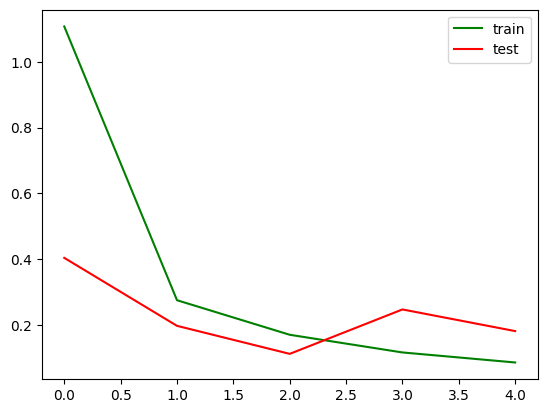

In [15]:
import matplotlib.pyplot as plt

plt.plot(losses, label='train', color='green')
plt.plot(losses_test, label='test', color='red')
plt.legend()

img, label = train_dataset[10]
img = img.unsqueeze(0)
img = img.to(device)
pred_result = model(img)
true_result = torch.tensor([label]).to(device)

nn.Softmax()(pred_result)

1

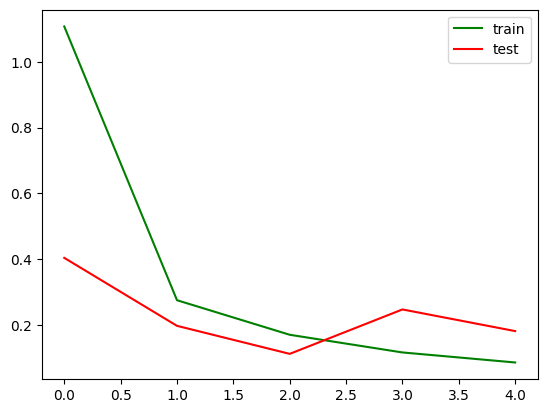

In [16]:
import matplotlib.pyplot as plt

plt.plot(losses, label='train', color='green')
plt.plot(losses_test, label='test', color='red')
plt.legend()

img, label = train_dataset[100]
img = img.unsqueeze(0)
img = img.to(device)
pred_result = model(img)
true_result = torch.tensor([label]).to(device)

nn.Softmax()(pred_result)
label


In [18]:
nn.Softmax()(pred_result)

tensor([[1.5799e-10, 9.9967e-01, 4.9488e-18, 6.3746e-14, 7.9180e-14, 2.1688e-30,
         3.1511e-06, 6.6459e-12, 4.8463e-28, 1.4466e-23, 3.7722e-09, 1.8103e-22,
         5.2118e-23, 5.7954e-07, 3.0732e-04, 6.3117e-07, 1.1039e-13, 5.0082e-14,
         1.3937e-05, 7.6309e-07, 2.0927e-20, 3.8656e-10, 4.0349e-12, 2.5746e-17,
         1.6423e-33, 2.3729e-13, 9.2817e-26, 8.2514e-22, 9.0563e-18, 9.6420e-28,
         1.0397e-19, 6.0913e-23, 3.1137e-10]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)

In [17]:
model

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=12288, out_features=200, bias=True)
  (2): ReLU()
  (3): Linear(in_features=200, out_features=60, bias=True)
  (4): ReLU()
  (5): Linear(in_features=60, out_features=33, bias=True)
)